## 1: How Guided Projects Work

Welcome to a Guided project! Guided projects help you synthesize concepts learned during the Dataquest missions, and start building a portfolio. Guided projects provide an in-browser coding experience along with help and hints. Guided projects bridge the gap between learning using the Dataquest missions, and applying the knowledge on your own computer.

Guided projects help you develop key skills that you'll need to perform data science work in the "real world". Doing well on these projects is slightly different from doing well in the missions, where there is a "right" answer. In the guided projects, you'll need to create solutions on your own (although we'll be there to help along the way).

In this project, you'll be working with Jupyter notebook, and analyzing data on the Star Wars movies. By the end, you'll have a notebook that you can add to your portfolio or build on top of on your own.

As you go through this project, Google, StackOverflow, and the documentation for various packages will help you along the way. All data scientists make extensive use of these and other resources as they write code.

We'd love to hear your feedback as you go through this project, and we hope it's a great experience!

## 2: Introduction

While waiting for Star Wars: The Force Awakens, the team at FiveThirtyEight was interested in answering some questions about Star Wars fans. One question that particularly interested the team was: Does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?

The team needed to collect data before they could get started answering this question. They used SurveyMonkey, an online survey tool, to survey Star Wars fans. They received 835 responses total.

The following code will read the data into a pandas Dataframe:

    import pandas as pd
    star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

We need to specify an encoding because the dataset has some characters that aren't in the Python default utf-8 encoding. You can read more about character encodings here.

The data has several columns, including:

- RespondentID -- An anonymized ID of the person taking the survey.
- Gender -- Gender of the respondent.
- Age -- Age of the respondent.
- Household Income -- Income of the respondent.
- Education -- Education level of the respondent.
- Location (Census Region) -- Location of the respondent.
- Have you seen any of the 6 films in the Star Wars franchise? -- Yes or No response.
- Do you consider yourself to be a fan of the Star Wars film franchise? -- Yes or No response.

There are several other columns, which involve questions about the Star Wars movies. Some questions involved checkboxes, where someone was asked which of several options they liked, and to check all the ones they did like. This type of data is hard to represent in columnar format, and you'll be cleaning up the columns extensively in this project.

This dataset needs a lot of cleaning, which makes it a good place to practice the skills you've been learning so far. The first step you'll take is to remove invalid rows. RespondentID is supposed to be a unique ID for each respondent, but it's blank in some rows. You'll need to remove any rows with an invalid RespondentID.

In [19]:
# Imports
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import re
import seaborn as sns
from mpl_toolkits.basemap import Basemap
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
% matplotlib inline

In [2]:
# Read in data
star_wars = pd.read_csv("data/StarWars.csv", encoding="ISO-8859-1")

In [3]:
star_wars.head(2)
star_wars.columns

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic


Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [4]:
star_wars = star_wars[pd.notnull(star_wars["RespondentID"])]
# OR
star_wars.dropna(inplace=True, axis=0,subset=["RespondentID"])

## 3: Cleaning Up Yes/No Columns

Take a look at the next two columns, which are:

* `Have you seen any of the 6 films in the Star Wars franchise?`
* `Do you consider yourself to be a fan of the Star Wars film franchise?`

You'll see that they are both Yes/No questions. There's another possible value they can take on, NaN, when a respondent chose not to answer that question. You can use the value_counts() method on a Series to see all the unique values in a column, and the counts of each value.

Both columns are currently string types -- Yes or No. In order to make it a bit easier to analyze down the line, convert each column to a Boolean, with only True, False, or NaN. Booleans are easier to work with because you can select the rows that are True or False without having to do a string comparisons.

You can use the map() method on Series to do this conversion.

If you have a Series that looks like this:

    series = ["Yes", "No", NaN, "Yes"]

You can use a dictionary to define a mapping from each value in series to a new value:

    yes_no = {
        "Yes": True,
        "No": False
    }

Then, you can call the map function to perform the mapping:

    series = series.map(yes_no)

series will end up looking like this:


    [True, False, NaN, True]

In [5]:
# mapping Yes/No to boolean True/False with map(dictionary)
yes_no = {'Yes':True,'No':False,True:True,False:False}

star_wars["Have you seen any of the 6 films in the Star Wars franchise?"] = star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].map(yes_no)
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] = star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].map(yes_no)

star_wars.head(3)


,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central


## 4: Cleaning Up Checkbox Columns

The next 6 columns represent a checkbox question. The respondent was asked Which of the following Star Wars films have you seen? Please select all that apply., and then was able to check off a series of boxes indicating which movies they saw.

The columns that represent this data are:

- Which of the following Star Wars films have you seen? Please select all that apply. -- whether or not the respondent saw Star Wars: Episode I The Phantom Menace.
- Unnamed: 4 -- whether or not the respondent saw Star Wars: Episode II Attack of the Clones.
- Unnamed: 5 -- whether or not the respondent saw Star Wars: Episode III Revenge of the Sith.
- Unnamed: 6 -- whether or not the respondent saw Star Wars: Episode IV A New Hope.
- Unnamed: 7 -- whether or not the respondent saw Star Wars: Episode V The Empire Strikes Back.
- Unnamed: 8 -- whether or not the respondent saw Star Wars: Episode VI Return of the Jedi.

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw it. If the value is NaN, the respondent either didn't answer, or didn't see the movie, but we'll assume that they didn't see the movie.

You need to convert each of these columns to a Boolean, then rename the column to have a more clear name. You can do the Boolean conversion like you did earlier, except you'll need to include the movie title and NaN in the mapping dictionary.

For example, if the column Series looks like this:

    ["Star Wars: Episode I  The Phantom Menace", NaN, "Star Wars: Episode I  The Phantom Menace"]
    
You can use a mapping dictionary that looks like this:

    {
        "Star Wars: Episode I  The Phantom Menace": True,
        NaN: False
    }
    
After you call the map() method on the Series, the column should only contain True or False values.

After the values are converted with the map method, you can rename the columns to better reflect what the values represent. You can use the rename() method on Dataframes for this.

The rename method works a lot like map. You pass it a dictionary that maps current column names to new ones:

    star_wars = star_wars.rename(columns={
        "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1"
    })

The rename method will only rename columns specified in the dictionary, and will not change the names of other columns. The above code will rename the *Which of the following Star Wars films have you seen? Please select all that apply.* column to seen_1.

In [6]:
star_wars.columns[3:9]

Index(['Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')

In [7]:
star_wars.iloc[:3,3:9]

,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
1,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
2,NaN,NaN,NaN,NaN,NaN,NaN
3,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN


In [8]:
cols = star_wars.columns[3:9]

# Booleans for column values
answers = {
        "Star Wars: Episode I  The Phantom Menace":True,
        "Star Wars: Episode II  Attack of the Clones":True, 
        "Star Wars: Episode III  Revenge of the Sith":True,
        "Star Wars: Episode IV  A New Hope":True,
        "Star Wars: Episode V The Empire Strikes Back":True,
        "Star Wars: Episode VI Return of the Jedi":True,
        True:True,
        False:False,
        np.nan:False
        }

for c in cols:
    star_wars[c] = star_wars[c].map(answers)    

In [9]:
star_wars.iloc[:3,3:9]

,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,True,True,True,False,False,False


answers = {
        "Star Wars: Episode I  The Phantom Menace",
        "Star Wars: Episode II  Attack of the Clones", 
        "Star Wars: Episode III  Revenge of the Sith",
        "Star Wars: Episode IV  A New Hope",
        "Star Wars: Episode V The Empire Strikes Back",
        "Star Wars: Episode VI Return of the Jedi",
        }

star_wars.iloc[:, 3:9] = star_wars.iloc[:, 3:9].isin(answers) 
#star_wars.iloc[:, 3:9].replace(np.NaN, False)

star_wars.iloc[:, 3:9]

In [10]:
# More descriptive column names    
newcols = {
    "Which of the following Star Wars films have you seen? Please select all that apply.":"seen_1",
    "Unnamed: 4":"seen_2",
    "Unnamed: 5":"seen_3",
    "Unnamed: 6":"seen_4",
    "Unnamed: 7":"seen_5",
    "Unnamed: 8":"seen_6"
    }
star_wars.rename(columns=newcols, inplace=True)

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## 5: Cleaning Up Ranking Columns

The next 6 columns ask the respondent to rank the Star Wars movies in order of least to most favorite. 1 means the film was their most favorite, and 6 means it was their least favorite. Each of the following columns can contain the values 1, 2, 3, 4, 5, 6, or NaN:

- Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film. -- How much the respondent liked Star Wars: Episode I The Phantom Menace.
- Unnamed: 10 -- How much the respondent liked Star Wars: Episode II Attack of the Clones.
- Unnamed: 11 -- How much the respondent liked Star Wars: Episode III Revenge of the Sith.
- Unnamed: 12 -- How much the respondent liked Star Wars: Episode IV A New Hope.
- Unnamed: 13 -- How much the respondent liked Star Wars: Episode V The Empire Strikes Back.
- Unnamed: 14 -- How much the respondent liked Star Wars: Episode VI Return of the Jedi.

You don't need to do a ton of cleanup for these columns. You'll need to convert each column to a numeric type, then rename the columns so you can tell what they're for more easily.

You can do the numeric conversion with the astype() method on Dataframes. In this case, you can use code that looks like this:

    star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

The code above will convert each column from column 9 up to but not including column 15 to a float type.

In [11]:
# Display columns before change
star_wars.iloc[:3,9:15]

# Convert next six columns to float
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

# More descriptive column names
newnames = {
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.":"ranking_1", 
    "Unnamed: 10":"ranking_2", 
    "Unnamed: 11":"ranking_3", 
    "Unnamed: 12":"ranking_4", 
    "Unnamed: 13":"ranking_5", 
    "Unnamed: 14":"ranking_6"
    }
star_wars.rename(columns=newnames, inplace=True)

# Display new columns
star_wars.iloc[:3,9:15]

,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
1,3,2,1,4,5,6
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2,3,4,5,6


,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0


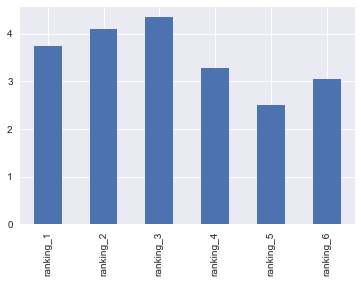

In [13]:
star_wars.iloc[:,9:15].mean().plot.bar()

Star Wars Episode V The Empire Strikes Back has the best average highest ranking.

## 7: Finding The Most Seen Movie

You cleaned up the seen columns earlier, and converted the values to the Boolean type. When you call methods like sum() or mean(), Booleans are treated like integers -- Trueis treated like a 1, and False is treated like a 0. This makes it easy to figure out how many people have seen each movie -- we just take the sum of the column.

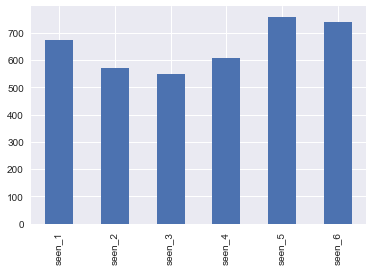

In [14]:
star_wars.iloc[:,3:9].sum().plot.bar()

The highest ranked movie turns out to also be the most watched.

## 8: Exploring The Data By Binary Segments

We've seen what the whole survey population thinks are the highest ranked movies, but we can break this down by segments. There are several columns that segment our data into two groups, including:

- Do you consider yourself to be a fan of the Star Wars film franchise? -- True or False.
- Do you consider yourself to be a fan of the Star Trek franchise? -- Yes or No.
- Gender -- Male or Female.

You can split a Dataframe into two groups based on a binary column by taking two subsets. Here, we'll split on the Gender column:

    males = star_wars[star_wars["Gender"] == "Male"]
    females = star_wars[star_wars["Gender"] == "Female"]

We can compute statistics like the most seen movie and the highest ranked movie separately for each group.

In [17]:
# split by gender
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

# split by fan
fan = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == True]
notfan = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == False]

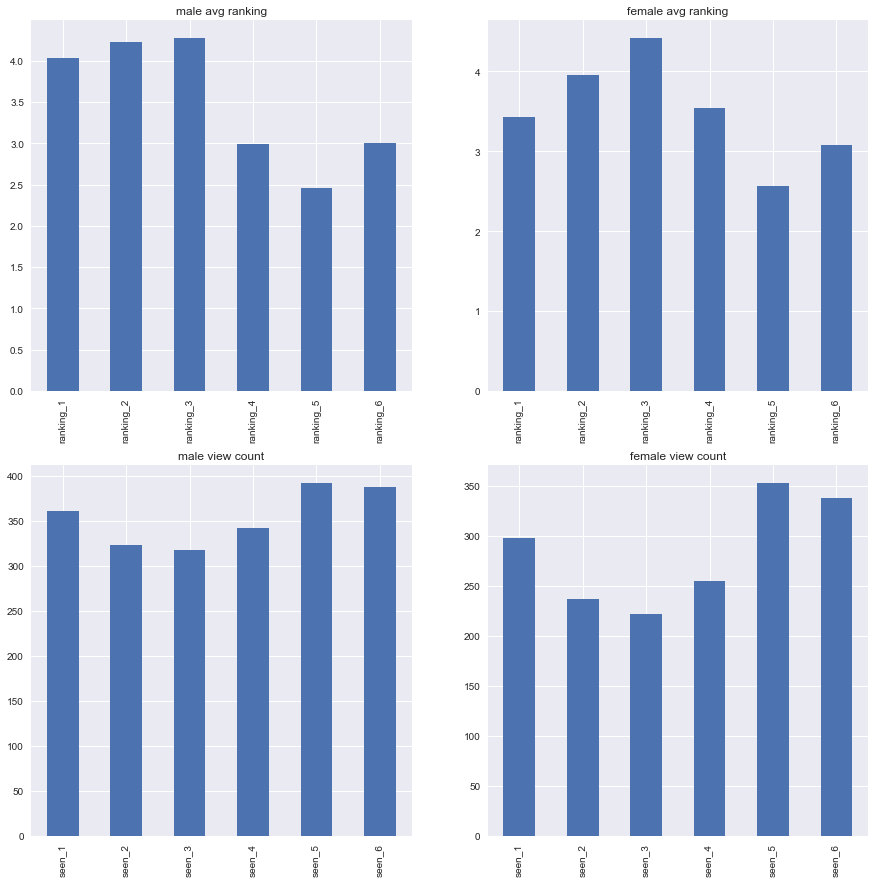

In [34]:
fig, ax = plt.subplots(2,2,figsize=(15,15))

ax[0,0] = males.iloc[:,9:15].mean().plot.bar(ax=ax[0,0],title='male avg ranking')
females.iloc[:,9:15].mean().plot.bar(ax=ax[0,1], title='female avg ranking')

males.iloc[:,3:9].sum().plot.bar(ax=ax[1,0], title='male view count')
females.iloc[:,3:9].sum().plot.bar(ax=ax[1,1], title='female view count')

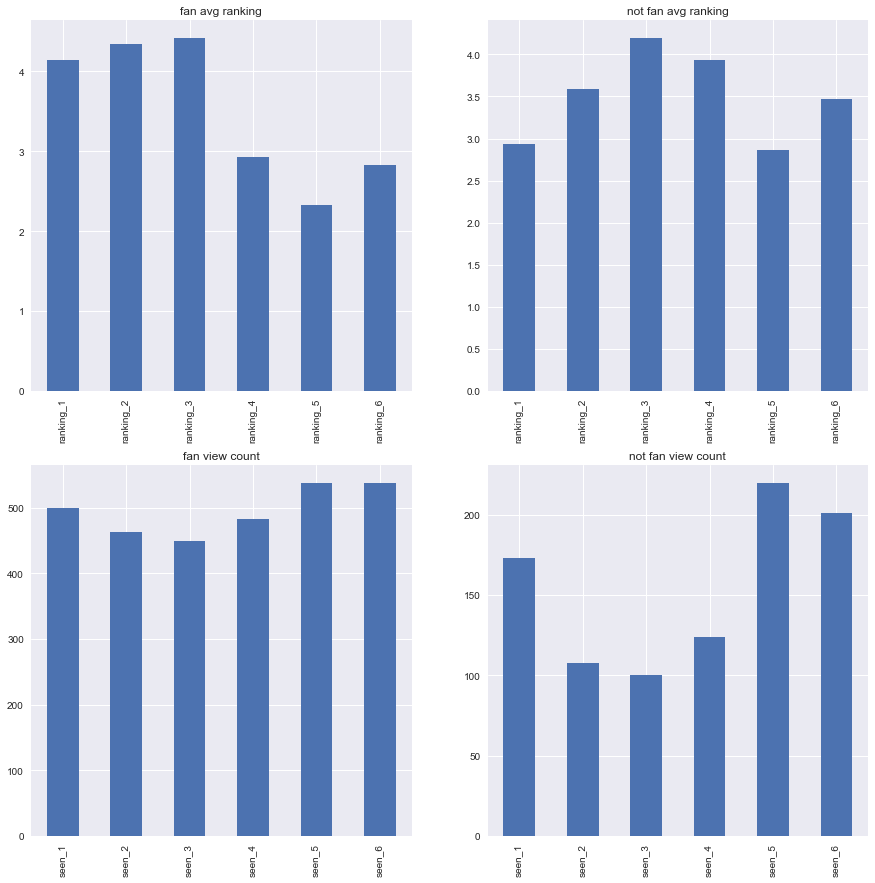

In [36]:
fig, ax = plt.subplots(2,2,figsize=(15,15))

ax[0,0] = fan.iloc[:,9:15].mean().plot.bar(ax=ax[0,0],title='fan avg ranking')
notfan.iloc[:,9:15].mean().plot.bar(ax=ax[0,1], title='not fan avg ranking')

fan.iloc[:,3:9].sum().plot.bar(ax=ax[1,0], title='fan view count')
notfan.iloc[:,3:9].sum().plot.bar(ax=ax[1,1], title='not fan view count')

Fans rate Episode I 4th best, while non-fans rate it 2nd best.